<a href="https://colab.research.google.com/github/zeruel91/DataAnalysis/blob/main/%EC%B2%AD%EC%86%8C%EB%85%84_%EC%A0%95%EC%8B%A0%EA%B1%B4%EA%B0%95_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

#간단한 문법 복습
dates = pd.date_range('20190301',periods = 6)
dates

DatetimeIndex(['2019-03-01', '2019-03-02', '2019-03-03', '2019-03-04',
               '2019-03-05', '2019-03-06'],
              dtype='datetime64[ns]', freq='D')

In [2]:
df = pd.DataFrame(np.random.randn(6,4), index = dates, columns = ['a','b','c','d'])
df

,a,b,c,d
2019-03-01,0.624253,-1.244318,2.238510,-0.431297
2019-03-02,-0.836662,-1.610970,-1.539360,-1.657634
2019-03-03,-1.702875,0.556982,0.125193,-0.224759
2019-03-04,0.380534,-0.478518,0.584031,-0.428338
2019-03-05,0.587943,0.744939,-0.422574,0.744358
2019-03-06,0.136741,-1.641662,0.804563,-1.090851


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.columns

Index(['a', 'b', 'c', 'd'], dtype='object')

In [5]:
df.index

DatetimeIndex(['2019-03-01', '2019-03-02', '2019-03-03', '2019-03-04',
               '2019-03-05', '2019-03-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df.describe()

,a,b,c,d
count,6.000000,6.000000,6.000000,6.000000
mean,-0.135011,-0.612258,0.298394,-0.514753
std,0.936941,1.066170,1.267200,0.815102
min,-1.702875,-1.641662,-1.539360,-1.657634
25%,-0.593311,-1.519307,-0.285632,-0.925963
50%,0.258637,-0.861418,0.354612,-0.429817
75%,0.536091,0.298107,0.749430,-0.275653
max,0.624253,0.744939,2.238510,0.744358


In [7]:
df.sort_values(by='a',ascending = True)

,a,b,c,d
2019-03-03,-1.702875,0.556982,0.125193,-0.224759
2019-03-02,-0.836662,-1.610970,-1.539360,-1.657634
2019-03-06,0.136741,-1.641662,0.804563,-1.090851
2019-03-04,0.380534,-0.478518,0.584031,-0.428338
2019-03-05,0.587943,0.744939,-0.422574,0.744358
2019-03-01,0.624253,-1.244318,2.238510,-0.431297


In [8]:
df.loc['2019-03-01']

a    0.624253
b   -1.244318
c    2.238510
d   -0.431297
Name: 2019-03-01 00:00:00, dtype: float64

In [9]:
df['a']>0

2019-03-01     True
2019-03-02    False
2019-03-03    False
2019-03-04     True
2019-03-05     True
2019-03-06     True
Freq: D, Name: a, dtype: bool

In [10]:
data = pd.read_excel('teenagemental.xls',header = 1,usecols="C:K") #헤드 날리고 필요한 열만 가져오기.

In [11]:
data

,전체,남학생,여학생,전체.1,남학생.1,여학생.1,전체.2,남학생.2,여학생.2
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


In [12]:
col_names = ['스트레스','스트레스_남','스트레스_여','우울감','우울_남','우울_여','자살','자살_남','자살_여']
data = pd.read_excel('teenagemental.xls',header = 1,usecols="C:K",names = col_names) #헤드 날리고 필요한 열만 가져오기.
data

,스트레스,스트레스_남,스트레스_여,우울감,우울_남,우울_여,자살,자살_남,자살_여
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


In [13]:
raw_data = pd.read_excel('teenagemental.xls',header = 1,usecols="C:K",names = col_names)
raw_data.loc[1] = 100.-raw_data.loc[0]  #행에는 .loc을 달아준다.
raw_data['응답']=['그렇다','아니다']    #열 추가시 이름만 지정해주면 된다.
#pandas 에서 열은 넘버(인덱스)의 용도위주
raw_data

,스트레스,스트레스_남,스트레스_여,우울감,우울_남,우울_여,자살,자살_남,자살_여,응답
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2,그렇다
1,57.3,65.5,48.5,70.4,75.8,64.6,84.6,88.2,80.8,아니다


In [14]:
raw_data.set_index('응답',drop=True, inplace=True)

NanumGothic Eco


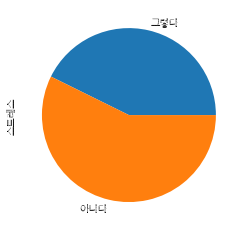

In [15]:
%matplotlib inline  
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
!apt-get update -qq
!apt-get install fonts-nanum* -qq
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
# 우선 fm._rebuild() 를 해주고
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False#마이너스 기호 나오게



raw_data['스트레스'].plot.pie()

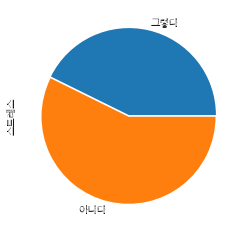

In [18]:
raw_data['스트레스'].plot.pie(explode=[0,0.02])    # 분리, 보통은 값을 강조할 때 사용

In [33]:
raw_data = pd.read_excel('ttl.xlsx',header = 1,usecols="C:K",names = col_names)
raw_data.loc[1] = 100.-raw_data.loc[0]  #행에는 .loc을 달아준다.
raw_data['응답']=['그렇다','아니다']
raw_data

,스트레스,스트레스_남,스트레스_여,우울감,우울_남,우울_여,자살,자살_남,자살_여,응답
0,38.7,31.3,46.7,27.7,22.1,33.6,14.4,11.1,17.9,그렇다
1,61.3,68.7,53.3,72.3,77.9,66.4,85.6,88.9,82.1,아니다


Text(0, 0.5, '')

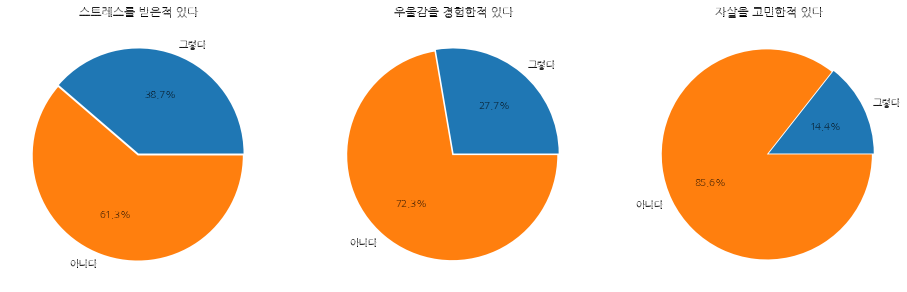

In [40]:
f, ax = plt.subplots(1,3,figsize=(16,8))
raw_data.set_index('응답',drop=True, inplace=True)

raw_data['스트레스'].plot.pie(explode=[0,0.02], ax= ax[0], autopct='%1.1f%%')
ax[0].set_title('스트레스를 받은적 있다')
ax[0].set_ylabel('')

raw_data['우울감'].plot.pie(explode=[0,0.02], ax= ax[1], autopct='%1.1f%%')
ax[1].set_title('우울감을 경험한적 있다')
ax[1].set_ylabel('')

raw_data['자살'].plot.pie(explode=[0,0.02], ax= ax[2], autopct='%1.1f%%')
ax[2].set_title('자살을 고민한적 있다')
ax[2].set_ylabel('')
